(-3.141592653589793, 3.141592653589793)

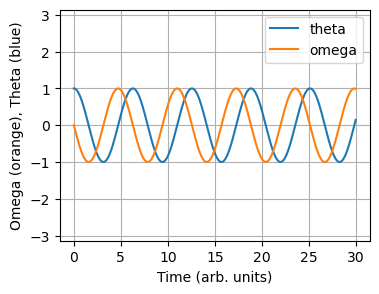

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters for the pendulum problem
k = 0.0  #damping constant
fi = 0.66637 #phase of driving force
A = 0.0 #amplitude of driving force
g = 1.0
L = 1.0

# Function for the pendulum model (linear approximation)
def f(theta,omega,t):
    force = (-g/L)*theta - k*omega + A*math.cos(fi*t)
    return force

# Setting the initial conditions (theta, omega, time)
theta = 1.0
omega = 0.0
t = 0.0
dt = 0.01
npoints = 3000

# Trapezoid method
# Lists to store the history of theta and omega
list_theta = [theta]
list_omega = [omega]
list_time = [t]

# Trapezoid method loop over a discrete timeline
for nstep in range(1,npoints):

    #Trapezoid block
    k1a = dt * omega
    k1b = dt * f(theta, omega, t)
    k2a = dt * (omega + k1b)
    k2b = dt * f(theta + k1a, omega + k1b, t + dt)
    theta = theta + (k1a + k2a)/2
    omega = omega + (k1b + k2b)/2

    #Update time
    t = t + dt

    #Append new values
    list_theta.append(theta)
    list_omega.append(omega)
    list_time.append(t)

# Plotting instructions
plt.figure(figsize=(4,3))
plt.plot(list_time, list_theta, label='theta')
plt.plot(list_time, list_omega, label='omega')
plt.legend()
plt.ylabel('Omega (orange), Theta (blue)')
plt.xlabel('Time (arb. units)')
plt.grid(True)
plt.ylim([-math.pi,math.pi])